### Segmentation

UNET – Network Architecture
The UNET architecture is a U-shaped encoder-decoder network, which consists of four encoder blocks and four decoder blocks that are connected by a bridge. The encoder network, also known as the contracting path, reduces the spatial dimensions and increases the number of filters (feature channels) at each encoder block. Conversely, the decoder network increases the spatial dimensions and reduces the number of feature channels.

Encoder
The encoder network acts as the feature extractor and learns an abstract representation of the input image through a sequence of the encoder blocks. Each encoder block consists of two 3×3 convolutions, where each convolution is followed by a ReLU (Rectified Linear Unit) activation function. The ReLU activation function introduces non-linearity into the network, which helps in the better generalization of the training data. The output of the ReLU acts as a skip connection for the corresponding decoder block.

Next, follows a 2×2 max-pooling, where the spatial dimensions (height and width) of the feature maps are reduced by half. This reduces the computational cost by decreasing the number of trainable parameters.

Skip Connections
These skip connections provide additional information that helps the decoder to generate better semantic features. They also act as a shortcut connection that helps in the direct flow of gradients to the earlier layers without degradation. In simple terms, we can say that skip connection helps in better flow of gradient while backpropagation. This helps the network to learn better representation and improve performance.

The block diagram of the encoder and the decoder block of the UNET architecture.
The block diagram of the encoder and the decoder block of the UNET architecture.
The above figure shows the block diagram of the encoder and decoder block used to build the UNET architecture.


Nikhil Tomar
19th January 2021
UNET is an architecture developed by Olaf Ronneberger and his team at the University of Freiburg in 2015 for biomedical image segmentation. It is a highly popular approach for semantic segmentation tasks. It is a fully convolutional neural network that is designed to learn from fewer training samples. This architecture is an improvement over the existing FCN (Fully convolutional networks for semantic segmentation) developed by Jonathan Long and his team in 2014.

Related articles on UNET

UNET Segmentation in TensorFlow
UNET Segmentation with Pretrained MobileNetV2 as Encoder
Polyp Segmentation using UNET in TensorFlow 2.0

The diagram of UNET Architecture from the original research paper.
UNET – Network Architecture
The UNET architecture is a U-shaped encoder-decoder network, which consists of four encoder blocks and four decoder blocks that are connected by a bridge. The encoder network, also known as the contracting path, reduces the spatial dimensions and increases the number of filters (feature channels) at each encoder block. Conversely, the decoder network increases the spatial dimensions and reduces the number of feature channels.

Encoder
The encoder network acts as the feature extractor and learns an abstract representation of the input image through a sequence of the encoder blocks. Each encoder block consists of two 3×3 convolutions, where each convolution is followed by a ReLU (Rectified Linear Unit) activation function. The ReLU activation function introduces non-linearity into the network, which helps in the better generalization of the training data. The output of the ReLU acts as a skip connection for the corresponding decoder block.

Next, follows a 2×2 max-pooling, where the spatial dimensions (height and width) of the feature maps are reduced by half. This reduces the computational cost by decreasing the number of trainable parameters.

Skip Connections
These skip connections provide additional information that helps the decoder to generate better semantic features. They also act as a shortcut connection that helps in the direct flow of gradients to the earlier layers without degradation. In simple terms, we can say that skip connection helps in better flow of gradient while backpropagation. This helps the network to learn better representation and improve performance.

The block diagram of the encoder and the decoder block of the UNET architecture.
The block diagram of the encoder and the decoder block of the UNET architecture.
The above figure shows the block diagram of the encoder and decoder block used to build the UNET architecture.

Bridge
The bridge connects the encoder and the decoder network and completes the flow of information. It consists of two 3×3 convolutions, where each convolution is followed by a ReLU activation function.

Decoder Network
The decoder network takes the abstract representation generated by the encoder and generates a semantic segmentation mask. The decoder block starts with a 2×2 transpose convolution, which is then concatenated with the corresponding skip connection feature map from the encoder block. These skip connections provide features from earlier layers that may have been lost due to the depth of the network. After this, two 3×3 convolutions are used, followed by a ReLU activation function

The output of the last decoder passes through a 1×1 convolution with sigmoid activation. The sigmoid activation function gives the segmentation mask representing the pixel-wise classification.

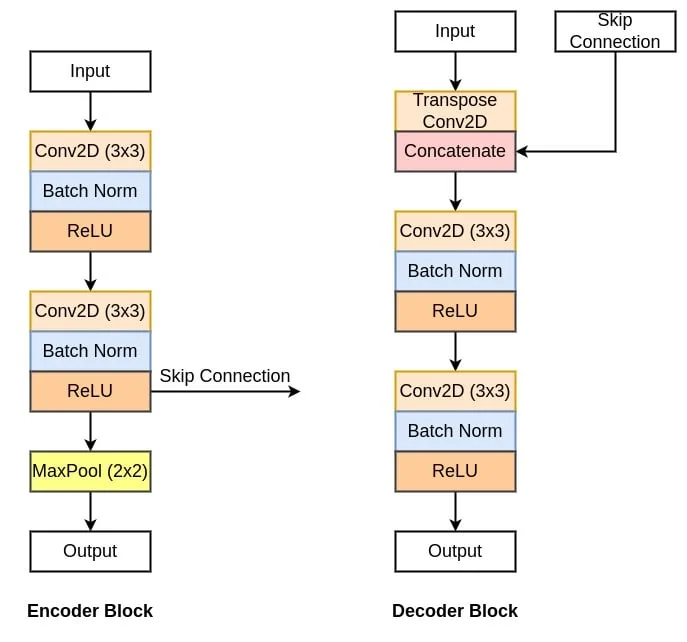

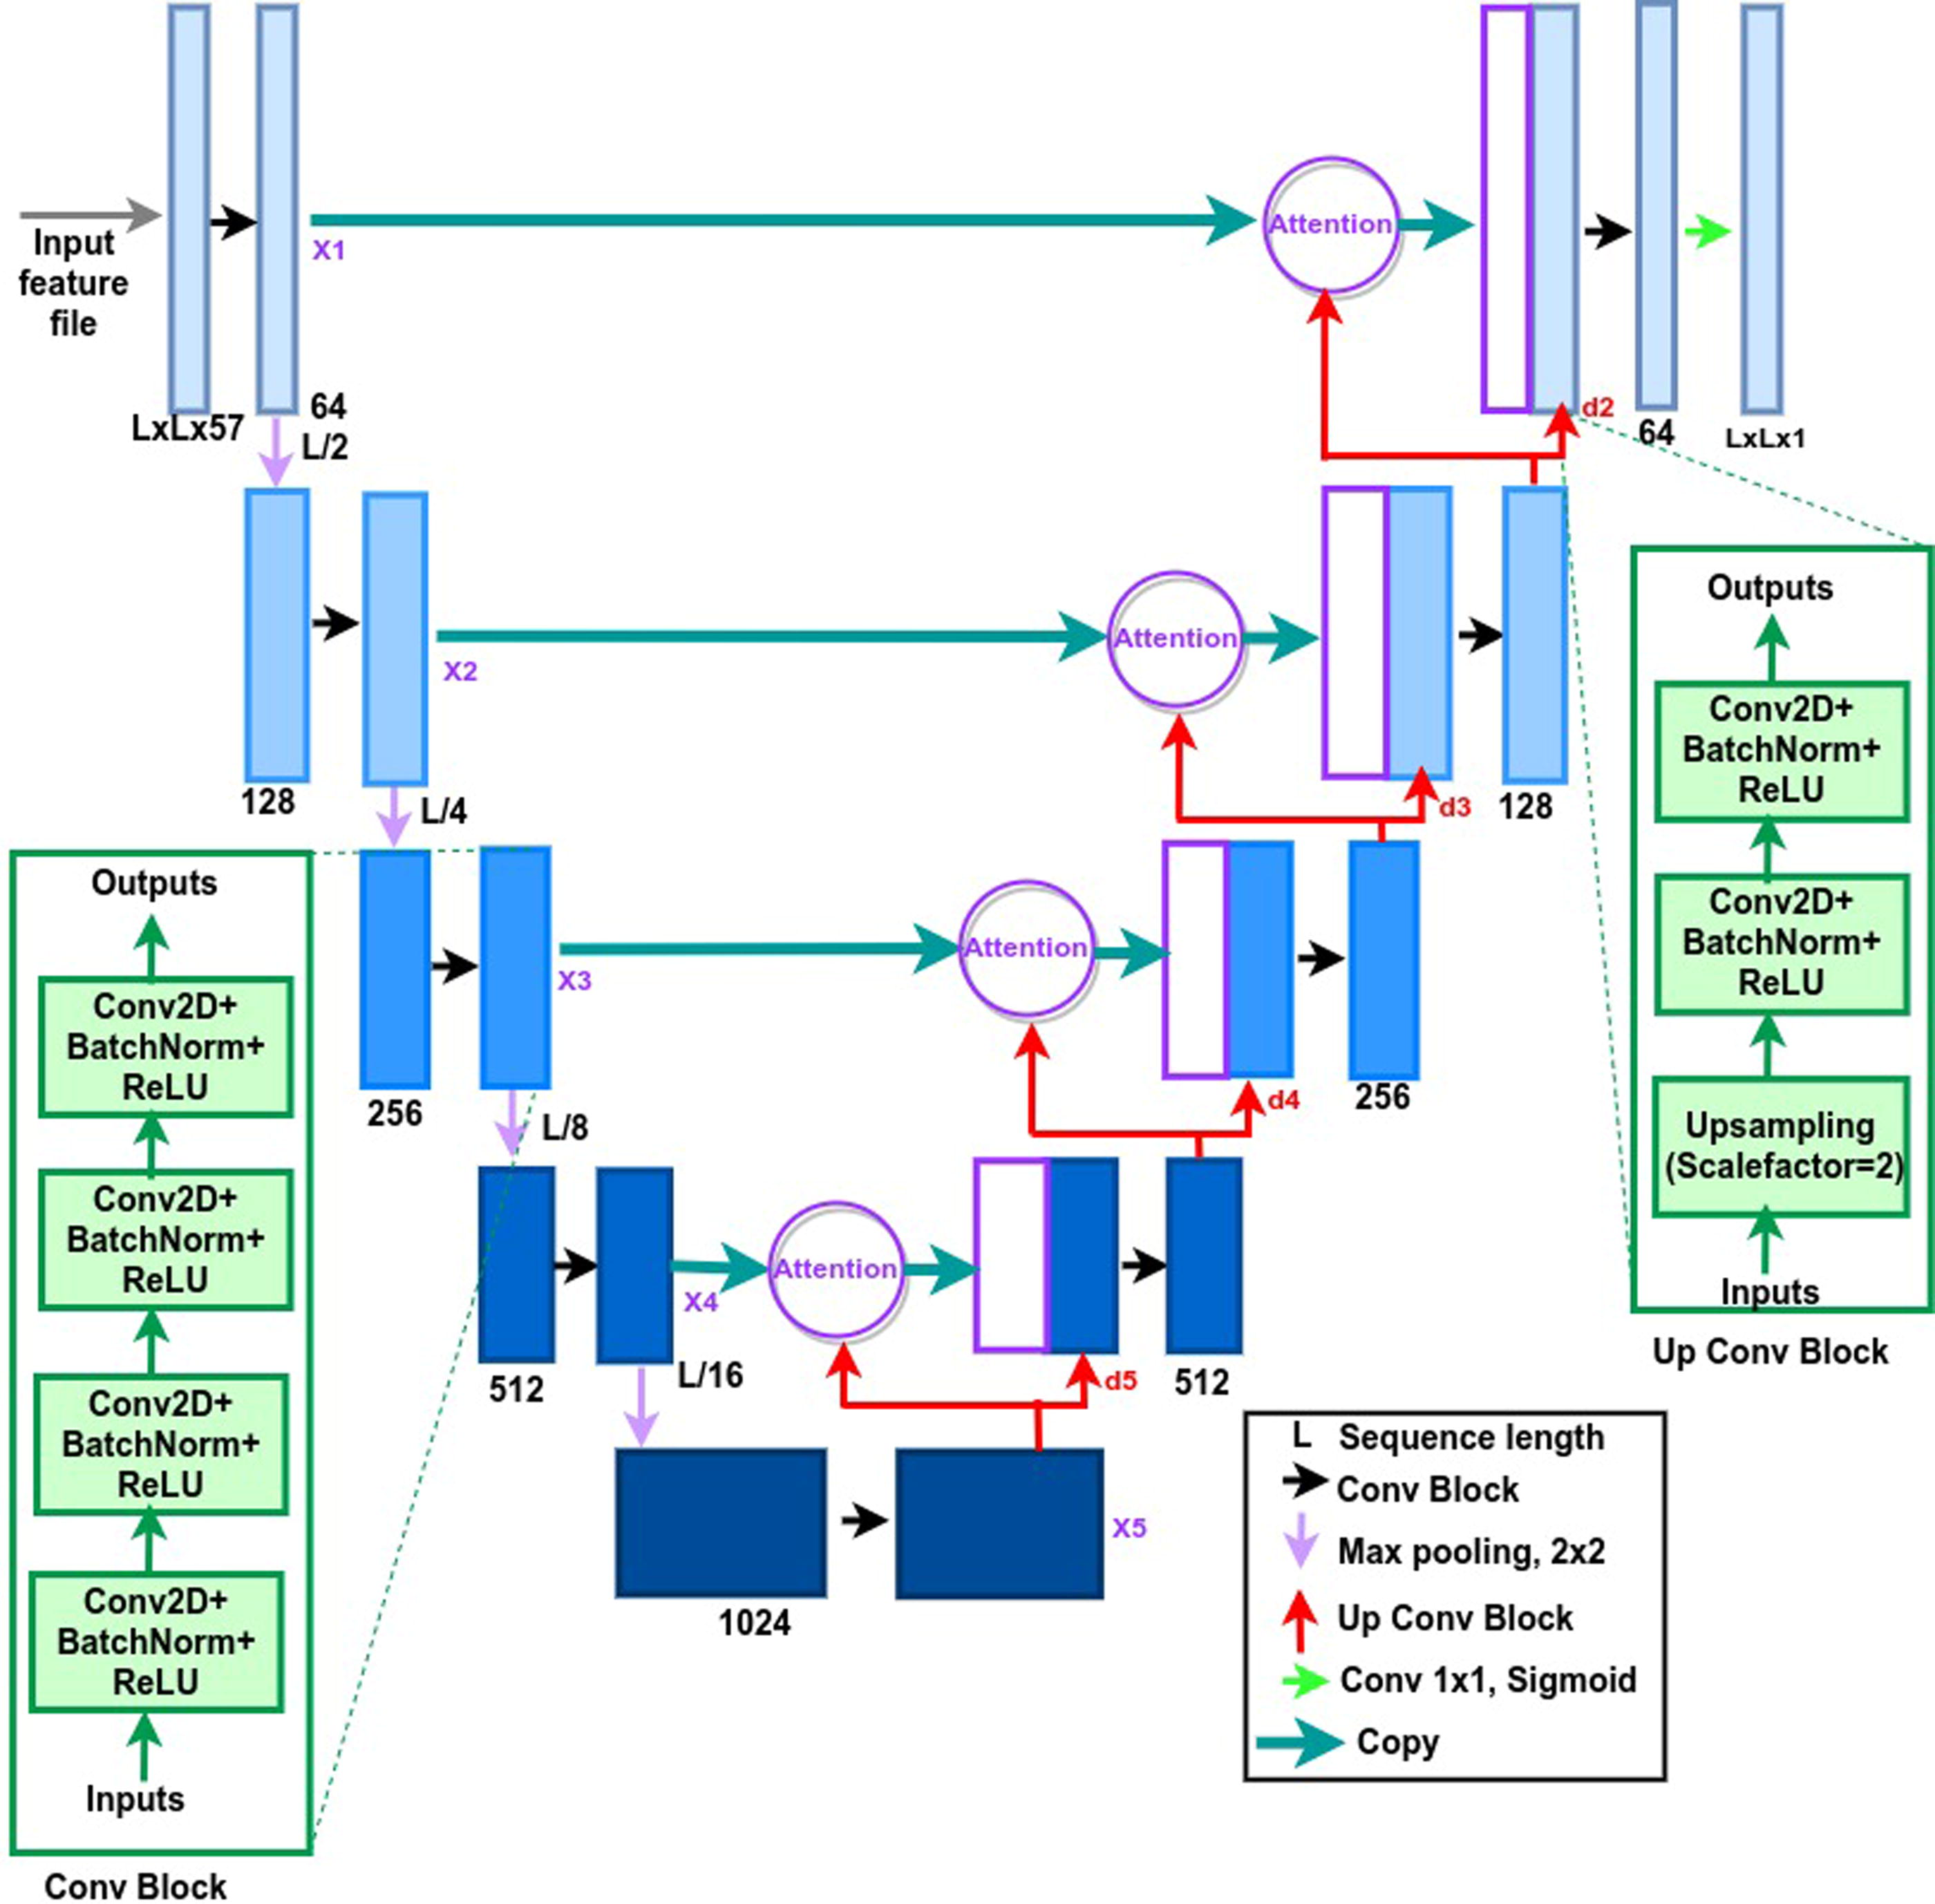

In [ ]:
# pip install scikit-learn

  Using cached scikit_learn-1.5.2-cp311-cp311-win_amd64.whl.metadata (13 kB)
  Using cached scipy-1.14.1-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp311-cp311-win_amd64.whl (11.0 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.14.1-cp311-cp311-win_amd64.whl (44.8 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import numpy as np
import cv2
from glob import glob
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, ReduceLROnPlateau, EarlyStopping, TensorBoard
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from unet import build_unet
from metrics import dice_loss, dice_coef

In [2]:
""" Global parameters """
H = 256
W = 256

In [3]:
path = 'tumour'

In [4]:
images = sorted(glob(os.path.join(path, "images", "*.png")))
masks = sorted(glob(os.path.join(path, "masks", "*.png")))


In [5]:
images[:5]

['tumour\\images\\1.png',
 'tumour\\images\\10.png',
 'tumour\\images\\100.png',
 'tumour\\images\\1000.png',
 'tumour\\images\\1001.png']

In [6]:
split = 0.2

In [7]:
split_size = int(len(images) * split)

train_x, valid_x = train_test_split(images, test_size=split_size, random_state=42)
train_y, valid_y = train_test_split(masks, test_size=split_size, random_state=42)

train_x, test_x = train_test_split(train_x, test_size=split_size, random_state=42)
train_y, test_y = train_test_split(train_y, test_size=split_size, random_state=42)

In [8]:
image_path = os.path.join(path, 'images','1.png')

In [9]:
# image_path = image_path.decode()
# x = cv2.imread(image_path, cv2.IMREAD_COLOR)
# x = cv2.resize(x, (W, H))
# x = x / 255.0
# x = x.astype(np.float32)

In [11]:
# x

In [12]:
masks_path = os.path.join(path, 'masks','1.png')

In [13]:
# masks_path = masks_path.decode()
# x = cv2.imread(masks_path, cv2.IMREAD_COLOR)
# x = cv2.resize(x, (W, H))
# x = x / 255.0
# y = x.astype(np.float32)

In [14]:
def read_image(path):
    path = path.decode()
    x = cv2.imread(path, cv2.IMREAD_COLOR)
    x = cv2.resize(x, (W, H))
    x = x / 255.0
    x = x.astype(np.float32)
    return x

def read_mask(path):
    path = path.decode()
    x = cv2.imread(path, cv2.IMREAD_GRAYSCALE)  ## (h, w)
    x = cv2.resize(x, (W, H))   ## (h, w)
    x = x / 255.0               ## (h, w)
    x = x.astype(np.float32)    ## (h, w)
    x = np.expand_dims(x, axis=-1)## (h, w, 1)
    return x

_parse  This is a nested function within tf_parse. It takes x and y as input, applies the

tf.numpy_function wraps the _parse function to integrate it with TensorFlow.
The first argument _parse is the function to be wrapped.
[x, y] are the input tensors.
[tf.float32, tf.float32] specifies the output data types.

In [15]:
def tf_parse(x, y):
    def _parse(x, y):
        x = read_image(x)
        y = read_mask(y)
        return x, y

    x, y = tf.numpy_function(_parse, [x, y], [tf.float32, tf.float32])
    x.set_shape([H, W, 3])
    y.set_shape([H, W, 1])
    return x, y

In [16]:
# def tf_dataset(X, Y, batch=2):
#     dataset = tf.data.Dataset.from_tensor_slices((X, Y))
#     dataset = dataset.map(tf_parse)
#     dataset = dataset.batch(batch)
#     dataset = dataset.prefetch(10)
#     return dataset

In [17]:
batch_size = 16

In [18]:
# train_dataset = tf_dataset(train_x, train_y, batch=batch_size)
# valid_dataset = tf_dataset(valid_x, valid_y, batch=batch_size)

In [19]:
train_dataset_raw = tf.data.Dataset.from_tensor_slices((train_x, train_y)) # combine x and y form a tensor object
train_dataset = train_dataset_raw.map(tf_parse)
train_dataset = train_dataset.batch(2) # 2 images for each batch should higher order as per memory allocation
train_dataset = train_dataset.prefetch(10)

In [20]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 256, 256, 1), dtype=tf.float32, name=None))>

In [21]:
next(iter(train_dataset_raw))[0]

<tf.Tensor: shape=(), dtype=string, numpy=b'tumour\\images\\2768.png'>

In [22]:
next(iter(train_dataset))[0] # batch =2 images

<tf.Tensor: shape=(2, 256, 256, 3), dtype=float32, numpy=
array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314]],

        ...,

        [[0.00392157, 0.00392157, 

Prefetching in TensorFlow
valid_dataset.prefetch(10) is a TensorFlow method that overlaps the preprocessing and model execution of your validation dataset.
What does prefetching do?
Overlaps computation and IO: Prefetching allows the dataset to preprocess and load batches in parallel with model execution.
Improves performance: By prefetching batches, you can reduce idle time and make your training process more efficient.
Faster validation: Prefetching speeds up validation steps, allowing for quicker model evaluation.

10 is the buffer size, which determines how many batches to prefetch.
A higher buffer size can improve performance but also increases memory usage.

In [23]:
valid_dataset_raw = tf.data.Dataset.from_tensor_slices((valid_x, valid_y))
valid_dataset = valid_dataset_raw.map(tf_parse)
valid_dataset = valid_dataset.batch(2)
valid_dataset = valid_dataset.prefetch(10)


In [24]:
valid_dataset_raw

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None))>

In [25]:
next(iter(valid_dataset_raw))

(<tf.Tensor: shape=(), dtype=string, numpy=b'tumour\\images\\2115.png'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'tumour\\masks\\2115.png'>)

In [26]:
next(iter(valid_dataset))[0]

<tf.Tensor: shape=(2, 256, 256, 3), dtype=float32, numpy=
array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.        , 0.        , 

In [27]:
print(f"Train: {len(train_x)} - {len(train_y)}")
print(f"Valid: {len(valid_x)} - {len(valid_y)}")
print(f"Test : {len(test_x)} - {len(test_y)}")

Train: 1840 - 1840
Valid: 612 - 612
Test : 612 - 612


In [28]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input
from tensorflow.keras.models import Model

In [29]:
input_shape = (256, 256, 3)
num_filters = 64

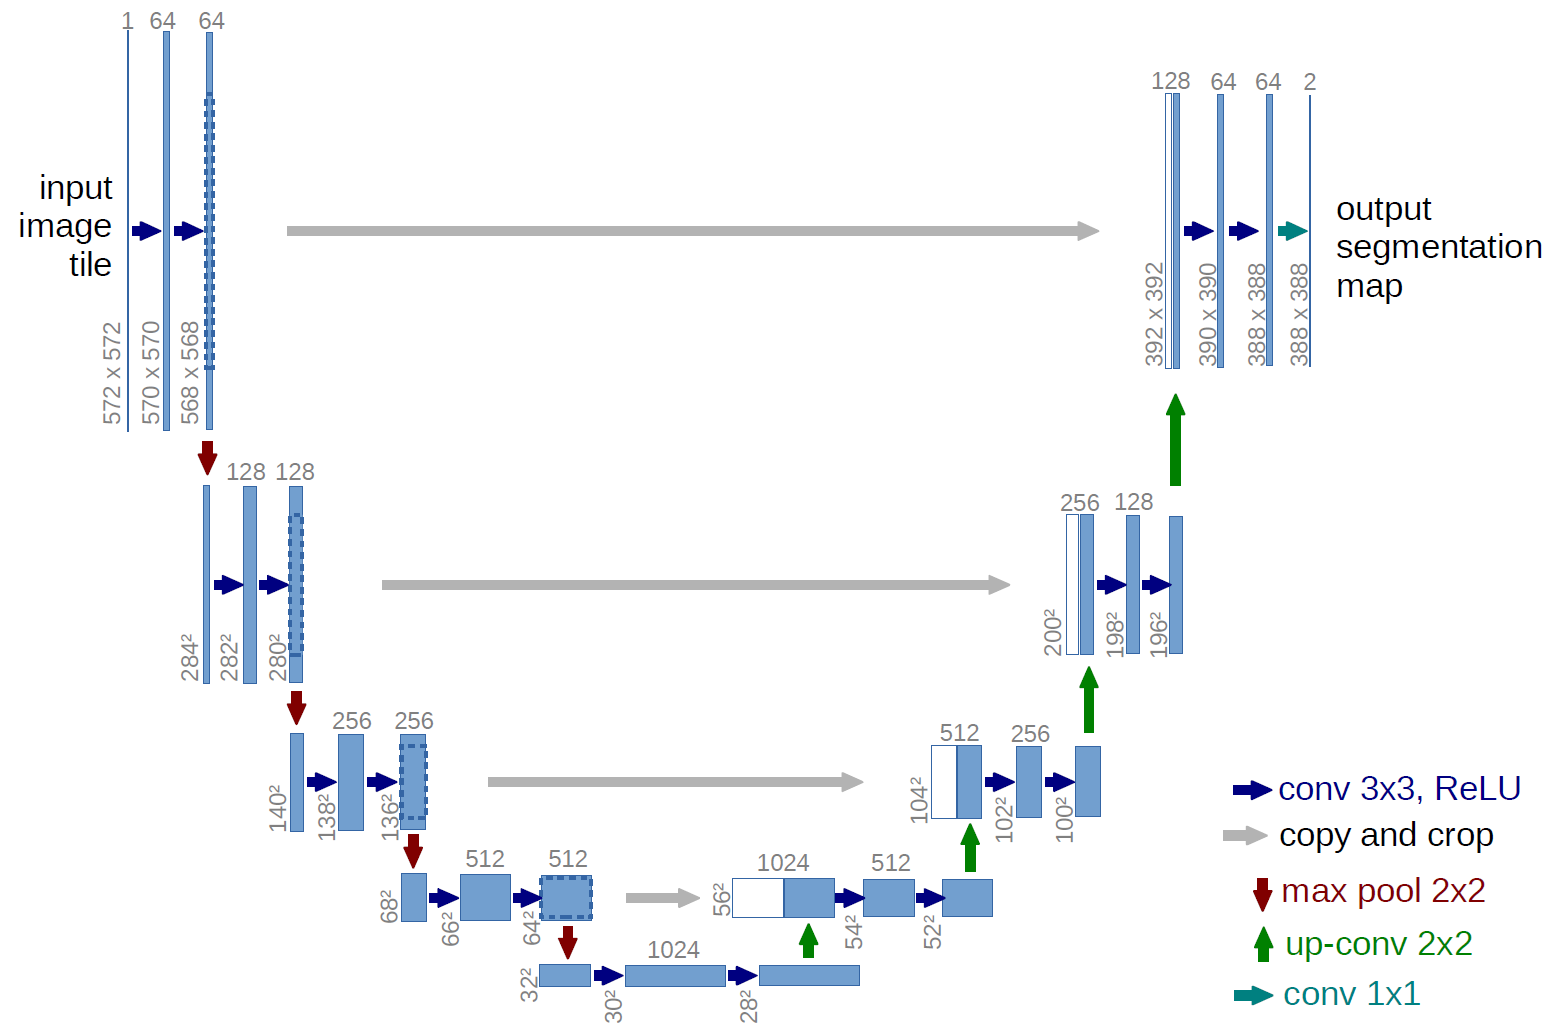

Unet

In [ ]:
def unet_model(input_shape=(256, 256, 3), num_classes=1):
    inputs = Input(input_shape)

    # Encoder (Contracting Path)
    x1 = Conv2D(64, 3, padding="same")(inputs)
    x1 = BatchNormalization()(x1) # reduce the internal covariate shift BN(x) = gamma * (x - mean) / sqrt(variance + epsilon) + beta 
    # BN has a regularization effect, which can help to prevent overfitting.
    x1 = Activation("relu")(x1)
    x1 = Conv2D(64, 3, padding="same")(x1)
    x1 = BatchNormalization()(x1)
    x1 = Activation("relu")(x1)
    p1 = MaxPool2D((2, 2))(x1)

    x2 = Conv2D(128, 3, padding="same")(p1)
    x2 = BatchNormalization()(x2)
    x2 = Activation("relu")(x2)
    x2 = Conv2D(128, 3, padding="same")(x2)
    x2 = BatchNormalization()(x2)
    x2 = Activation("relu")(x2)
    p2 = MaxPool2D((2, 2))(x2)

    x3 = Conv2D(256, 3, padding="same")(p2)
    x3 = BatchNormalization()(x3)
    x3 = Activation("relu")(x3)
    x3 = Conv2D(256, 3, padding="same")(x3)
    x3 = BatchNormalization()(x3)
    x3 = Activation("relu")(x3)
    p3 = MaxPool2D((2, 2))(x3)

    x4 = Conv2D(512, 3, padding="same")(p3)
    x4 = BatchNormalization()(x4)
    x4 = Activation("relu")(x4)
    x4 = Conv2D(512, 3, padding="same")(x4)
    x4 = BatchNormalization()(x4)
    x4 = Activation("relu")(x4)
    p4 = MaxPool2D((2, 2))(x4)

    # Bottleneck
    x5 = Conv2D(1024, 3, padding="same")(p4)
    x5 = BatchNormalization()(x5)
    x5 = Activation("relu")(x5)
    x5 = Conv2D(1024, 3, padding="same")(x5)
    x5 = BatchNormalization()(x5)
    x5 = Activation("relu")(x5)

    # Decoder (Expanding Path)
    x6 = Conv2DTranspose(512, 2, strides=2, padding="same")(x5)
    x6 = Concatenate()([x6, x4])
    x6 = Conv2D(512, 3, padding="same")(x6)
    x6 = BatchNormalization()(x6)
    x6 = Activation("relu")(x6)
    x6 = Conv2D(512, 3, padding="same")(x6)
    x6 = BatchNormalization()(x6)
    x6 = Activation("relu")(x6)

    x7 = Conv2DTranspose(256, 2, strides=2, padding="same")(x6)
    x7 = Concatenate()([x7, x3])
    x7 = Conv2D(256, 3, padding="same")(x7)
    x7 = BatchNormalization()(x7)
    x7 = Activation("relu")(x7)
    x7 = Conv2D(256, 3, padding="same")(x7)
    x7 = BatchNormalization()(x7)
    x7 = Activation("relu")(x7)

    x8 = Conv2DTranspose(128, 2, strides=2, padding="same")(x7)
    x8 = Concatenate()([x8, x2])
    x8 = Conv2D(128, 3, padding="same")(x8)
    x8 = BatchNormalization()(x8)
    x8 = Activation("relu")(x8)
    x8 = Conv2D(128, 3, padding="same")(x8)
    x8 = BatchNormalization()(x8)
    x8 = Activation("relu")(x8)

    x9 = Conv2DTranspose(64, 2, strides=2, padding="same")(x8)
    x9 = Concatenate()([x9, x1])
    x9 = Conv2D(64, 3, padding="same")(x9)
    x9 = BatchNormalization()(x9)
    x9 = Activation("relu")(x9)
    x9 = Conv2D(64, 3, padding="same")(x9)
    x9 = BatchNormalization()(x9)
    x9 = Activation("relu")(x9)

    # Output layer 1. Binary Segmentation (Foreground vs Background) num_classes==1 else # Multi-Class Segmentation with Sparse Labels
    outputs = Conv2D(num_classes, 1, activation="sigmoid" if num_classes == 1 else "softmax")(x9)
    
    

    model = Model(inputs, outputs)
    return model



Internal Covariate Shift (ICS) is a phenomenon that occurs during the training of deep neural networks.
What is ICS?
ICS refers to the change in the distribution of the input data for each layer during training. This change occurs because the parameters of the previous layers are constantly being updated, which affects the input distribution for the subsequent layers.

In [ ]:
# Create the model
unet = unet_model() # no pre trained model so no freeze layer 
unet.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │      1,792 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 256, 256,  │        256 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 256, 256,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │     36,928 │ activation[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 256, 256,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ activation_1[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        512 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │    147,584 │ activation_2[0][… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        512 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ activation_3[0][… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │      1,024 │ conv2d_4[0][0]  

 Total params: 31,055,297 (118.47 MB)

 Trainable params: 31,043,521 (118.42 MB)

 Non-trainable params: 11,776 (46.00 KB)

In [32]:
unet.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"]) # for binary classification
# loss = "categorical_crossentropy" for multi-class segmentation



In [34]:
unet.fit(train_dataset, epochs=1, batch_size=16, validation_data=(valid_dataset))

 10/920 ━━━━━━━━━━━━━━━━━━━━ 1:52:04 7s/step - accuracy: 0.9675 - loss: 0.2469

KeyboardInterrupt: 

In [ ]:
# it takes too much time in my machine

In [ ]:
unet.evaluate(test_dataset, epochs=1, batch_size=16)

In [ ]:
def read_image(path):
    path = path.decode()
    x = cv2.imread(path, cv2.IMREAD_COLOR)
    x = cv2.resize(x, (W, H))
    x = x / 255.0
    x = x.astype(np.float32)
    return x

In [ ]:
img = read_image('CV/tumour/images/1.png')

In [ ]:
unet.predict(img)